In [ ]:
# performing linear algebra
import numpy as np 
  
# data processing
import pandas as pd
  
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

#GeeksForGeeks

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Projects/IBM-HR-Employee-Attrition.csv")
print (dataset.head)

FileNotFoundError: ignored

In [ ]:
# Importing file
from google.colab import files
data_upload = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
dataset = pd.read_csv('dataset.csv')
display(dataset)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


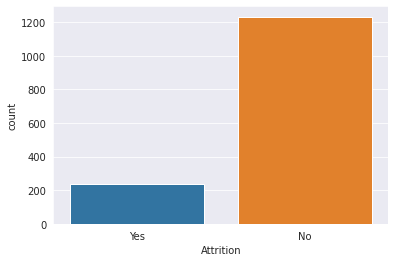

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = dataset)

In [ ]:
dataset.drop('EmployeeCount', axis = 1, inplace = True)
dataset.drop('StandardHours', axis = 1, inplace = True)
dataset.drop('EmployeeNumber', axis = 1, inplace = True)
dataset.drop('Over18', axis = 1, inplace = True)
print(dataset.shape)

(1470, 31)


In [ ]:
y = dataset.iloc[:, 1]
X = dataset
X.drop('Attrition', axis = 1, inplace = True)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'], prefix ='BusinessTravel')
dum_Department = pd.get_dummies(dataset['Department'], prefix ='Department')
dum_EducationField = pd.get_dummies(dataset['EducationField'], prefix ='EducationField')
dum_Gender = pd.get_dummies(dataset['Gender'], prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(dataset['JobRole'], prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(dataset['OverTime'], prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department, dum_EducationField, dum_Gender, dum_JobRole, dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)
  
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

The optimal number of neighbors is  7 


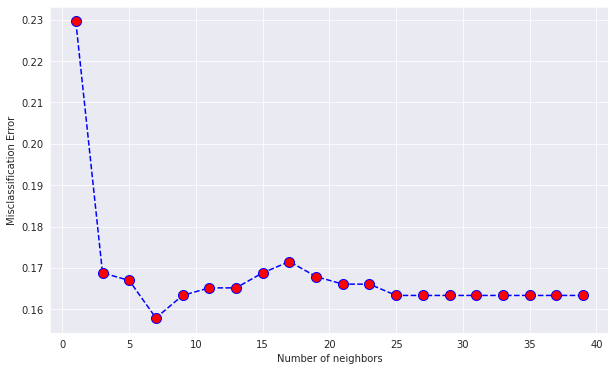

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
neighbors = [] 
cv_scores = [] 
    
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 40, 2): 
  neighbors.append(k) 
  knn = KNeighborsClassifier(n_neighbors = k) 
  scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
  cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores] 
    
# determining the best k 
optimal_k = neighbors[error_rate.index(min(error_rate))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
    
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")
          
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       922
           1       0.83      0.19      0.32       180

    accuracy                           0.86      1102
   macro avg       0.85      0.59      0.62      1102
weighted avg       0.86      0.86      0.82      1102


Confusion Matrix: 
 [[915   7]
 [145  35]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0148
accuracy score: 0.8621

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       311
           1       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368


Confusion Matrix: 
 [[299  12]
 [ 55   2]]

accuracy score: 0.817

#TowardsDataScience

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber', 'Over18'] , inplace=True)
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
preserved_mapper = {'Travel_Frequently':2 , 'Travel_Rarely': 1, 'Non-Travel': 0}
df = df.replace(preserved_mapper)
int_cols = df.select_dtypes(include='int64').columns

In [ ]:
for col in int_cols :
    df.boxplot(column =col,grid = False)
    plt.show()

In [ ]:
int_data = df[int_cols]
sym_feat = []
for col in int_cols:
  skewness = df[col].skew()
  if abs(skewness)>1:  
    sns.distplot(df[col])
    skew = 'Skewness:' + str(skewness)
    plt.legend([skew])
    plt.show()
  else:
    sym_feat.append(col)

print('Symmetric Features are:', end=' ')
for f in sym_feat:
  print(f, end=', ')

  #print('Skewness for', col, 'is:',df[col].skew(),'\n')

In [ ]:
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])
df['TotalWorkingYears'] = np.sqrt(df['TotalWorkingYears'])
df['YearsAtCompany'] = np.sqrt(df['YearsAtCompany'])
df['YearsSinceLastPromotion'] = np.power(df['YearsSinceLastPromotion'],1/3)

In [ ]:
int_cols = df.select_dtypes(include='int64').columns
int_cols

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
dataset = df[int_cols]
dataset

In [ ]:
X_int = dataset.drop('Attrition', axis=1) # training features
Y = dataset.Attrition # target feature

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_int = scaler.fit_transform(X_int)

In [ ]:
X_int = pd.DataFrame(X_int,columns=dataset.columns[dataset.columns != 'Attrition'])

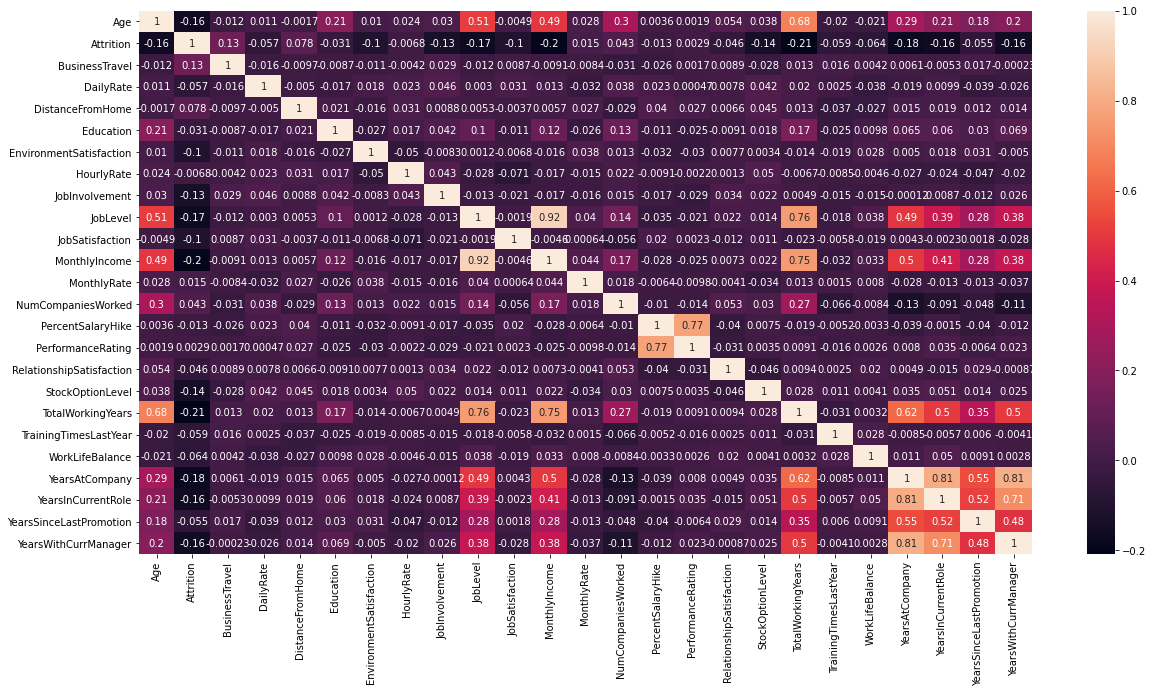

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [ ]:
df.drop(columns=[ 'JobLevel','PerformanceRating'] , inplace=True)

In [ ]:
df.skew()

##Feature Engineering

In [ ]:
#df['Holistic'] = df['JobSatisfaction'] + df['EnvironmentSatisfaction'] + df['JobInvolvement'] + df['RelationshipSatisfaction']
#df.drop(columns=[ 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction'] , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


<BarContainer object of 13 artists>

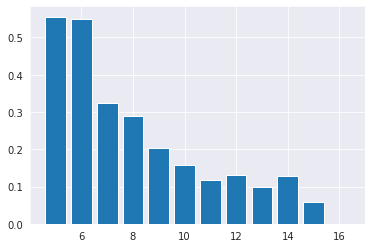

In [ ]:
x = [i for i in range(4,17)]
y = []
for i in range(4,17):
  proportion = df[(df['Holistic']==i) & (df['Attrition']==1)].Attrition.count()/df[df['Holistic']==i].Attrition.count()
  y.append(proportion)
plt.bar(x,y)

In [ ]:
import plotly.offline as py
import plotly.figure_factory as ff
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [ ]:
def plot_distribution(var_select, bin_size): 
# Calculate the correlation coefficient between the new variable and the target
  corr = df['Attrition'].corr(df[var_select])
  corr = np.round(corr,3)
  tmp1 = attrition[var_select]
  tmp2 = no_attrition[var_select]
  hist_data = [tmp1, tmp2]
  
  group_labels = ['Yes_attrition', 'No_attrition']
  colors = ['#FFD700', '#7EC0EE']

  fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
  
  fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

  py.iplot(fig, filename = 'Density plot')

plot_distribution('PerformanceRating', 100)

KeyError: ignored

In [ ]:
def barplot(var_select, x_no_numeric) :
  tmp1 = data[(data['Attrition'] != 0)]
  tmp2 = data[(data['Attrition'] == 0)]
  tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
  tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
  if x_no_numeric == True  : 
      tmp3 = tmp3.sort_values(1, ascending = False)

  color=['lightskyblue','gold' ]
  trace1 = go.Bar(
      x=tmp1[var_select].value_counts().keys().tolist(),
      y=tmp1[var_select].value_counts().values.tolist(),
      name='Yes_Attrition',opacity = 0.8, marker=dict(
      color='gold',
      line=dict(color='#000000',width=1)))

  
  trace2 = go.Bar(
      x=tmp2[var_select].value_counts().keys().tolist(),
      y=tmp2[var_select].value_counts().values.tolist(),
      name='No_Attrition', opacity = 0.8, marker=dict(
      color='lightskyblue',
      line=dict(color='#000000',width=1)))
  
  trace3 =  go.Scatter(   
      x=tmp3.index,
      y=tmp3['Attr%'],
      yaxis = 'y2',
      name='% Attrition', opacity = 0.6, marker=dict(
      color='black',
      line=dict(color='#000000',width=0.5
      )))

  layout = dict(title =  str(var_select),
            xaxis=dict(), 
            yaxis=dict(title= 'Count'), 
            yaxis2=dict(range= [-0, 75], 
                        overlaying= 'y', 
                        anchor= 'x', 
                        side= 'right',
                        zeroline=False,
                        showgrid= False, 
                        title= '% Attrition'
                        ))

  fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
  py.iplot(fig)

In [ ]:
df[df['Department']=='Sales'].MonthlyIncome.mean()
df[df['Department']=='Sales'].PercentSalaryHike.mean()

In [ ]:
df[df['Department']=='Research & Development'].MonthlyIncome.mean()
df[df['Department']=='Research & Development'].PercentSalaryHike.mean()

In [ ]:
df[df['Department']=='Human Resources'].MonthlyIncome.mean()
df[df['Department']=='Human Resources'].PercentSalaryHike.mean()

In [ ]:
df.MonthlyIncome.mean()

In [ ]:
df.columns

##Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2)
fit = test.fit(X, y)
fit.scores_

In [ ]:
x1 = df['Education'].values.reshape(-1,1)
chi2(x1,y)

In [ ]:
chai2,p=chi2(X,y)
stats = pd.DataFrame(list(zip(list(X.columns),chai2,p)),columns=['feature','chi2','p-value'])
stats.sort_values(by=['p-value'])

##PCA

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
compo=pca.fit_transform(X)

# Explained variance ratio
explained_variance = np.var(compo, axis=0)
evr= explained_variance/np.sum(explained_variance) *100
cevr=np.cumsum(evr)
cevr

# Dummies

In [ ]:
y = df['Attrition']
X = df.drop(columns='Attrition')

dataset = df
# dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'], prefix ='BusinessTravel')
dum_Department = pd.get_dummies(dataset['Department'], prefix ='Department')
dum_EducationField = pd.get_dummies(dataset['EducationField'], prefix ='EducationField')
dum_Gender = pd.get_dummies(dataset['Gender'], prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(dataset['JobRole'], prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(dataset['OverTime'], prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([X_int, dum_Department, dum_EducationField, dum_Gender, dum_JobRole, dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
#X.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis = 1, inplace = True)
  
print(X.shape)
print(y.shape)

(1470, 43)
(1470,)


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [ ]:
# x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

# # Randomoversampler
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

# # uvs = RandomUnderSampler(random_state=42)
# # x_train, y_train = uvs.fit_sample(x_train, y_train )

# ovs = RandomOverSampler(random_state=42)
# x_train, y_train = ovs.fit_sample(x_train, y_train )

### Without SMOTE

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
for train_index, test_index in split.split(X, y):
  x_train = X.loc[train_index]
  x_test = X.loc[test_index]
  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

In [ ]:
# x_train, x_test, y_train, y_test = StratifiedShuffleSplit(X, y, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print_score(lr, x_train, y_train, x_test, y_test, train = True)
print_score(lr, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       986
           1       0.77      0.47      0.58       190

    accuracy                           0.89      1176
   macro avg       0.84      0.72      0.76      1176
weighted avg       0.88      0.89      0.88      1176


Confusion Matrix: 
 [[960  26]
 [101  89]]

Average Accuracy: 	 0.8767
Accuracy SD: 		 0.0221
accuracy score: 0.8920

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294


Confusion Matrix: 
 [[241   6]
 [ 30  17]]

accuracy score: 0.877

In [ ]:
# classification
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

print_score(svc, x_train, y_train, x_test, y_test, train = True)
print_score(svc, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       986
           1       0.99      0.51      0.67       190

    accuracy                           0.92      1176
   macro avg       0.95      0.75      0.81      1176
weighted avg       0.93      0.92      0.91      1176


Confusion Matrix: 
 [[985   1]
 [ 93  97]]

Average Accuracy: 	 0.8588
Accuracy SD: 		 0.0143
accuracy score: 0.9201

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.83      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.87      0.83       294


Confusion Matrix: 
 [[245   2]
 [ 37  10]]

accuracy score: 0.867

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=15, random_state=0)
rf.fit(x_train,y_train)
print_score(rf, x_train, y_train, x_test, y_test, train = True)
print_score(rf, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[986   0]
 [  0 190]]

Average Accuracy: 	 0.8512
Accuracy SD: 		 0.0081
accuracy score: 1.0000

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294


Confusion Matrix: 
 [[245   2]
 [ 42   5]]

accuracy score: 0.850

In [ ]:
from sklearn.ensemble import VotingClassifier
vf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svc', svc)],voting='hard')
vf.fit(x_train, y_train)
print_score(vf, x_train, y_train, x_test, y_test, train = True)
print_score(vf, x_train, y_train, x_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       986
           1       0.99      0.58      0.74       190

    accuracy                           0.93      1176
   macro avg       0.96      0.79      0.85      1176
weighted avg       0.94      0.93      0.92      1176


Confusion Matrix: 
 [[985   1]
 [ 79 111]]

Average Accuracy: 	 0.8597
Accuracy SD: 		 0.0153
accuracy score: 0.9320

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.83      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.87      0.83       294


Confusion Matrix: 
 [[245   2]
 [ 37  10]]

accuracy score: 0.867

In [ ]:
def fun(x):
  return x[1]
srt = list(zip(X.columns,rf.feature_importances_))
srt = sorted(srt, key = fun, reverse = True)

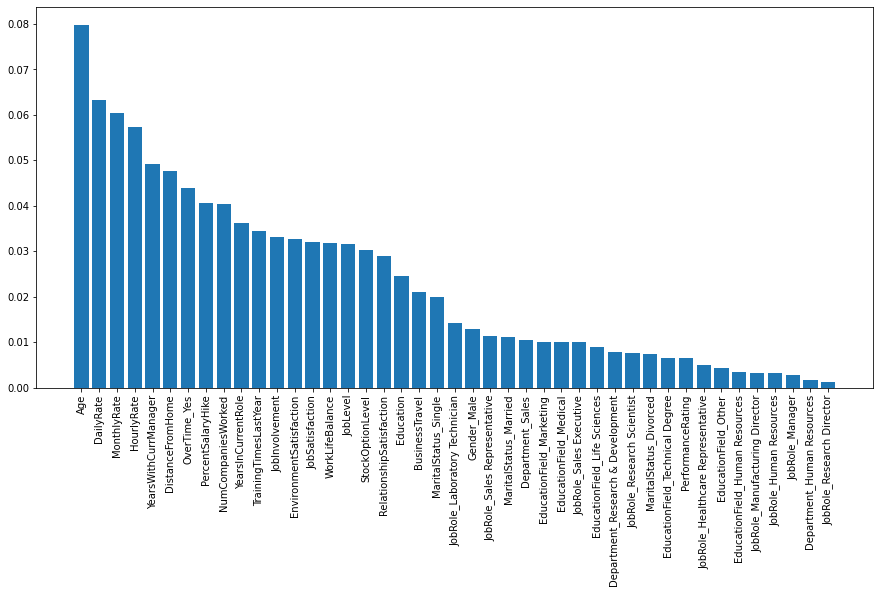

In [ ]:
plt.figure(figsize = (15,7))
plt.bar(*zip(*srt))
plt.xticks(rotation = 90)
plt.show()

### **After PCA**

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=35)
X_pca=pca.fit_transform(X)

# Explained variance ratio
explained_variance = np.var(X_pca, axis=0)
evr= explained_variance/np.sum(explained_variance) *100
cevr=np.cumsum(evr)
cevr

array([ 10.08795939,  17.85855053,  24.18313033,  29.55403358,
        34.36918969,  39.02908073,  43.63784088,  48.17922092,
        52.55538985,  56.89051459,  61.15801777,  65.29335281,
        69.37125658,  73.37974017,  77.24292472,  80.88933413,
        83.87661842,  86.55813407,  88.42877863,  89.96410837,
        91.43990099,  92.65040352,  93.70141355,  94.68214601,
        95.5422132 ,  96.31297769,  96.92660229,  97.47906482,
        97.96726611,  98.41424549,  98.81121958,  99.1624345 ,
        99.49637887,  99.75109237, 100.        ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.25, random_state = 40)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))

0.875


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [ ]:
print_score(svc, X_train, y_train, X_test, y_test, train = True)
print_score(svc, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       922
           1       0.99      0.46      0.62       180

    accuracy                           0.91      1102
   macro avg       0.95      0.73      0.79      1102
weighted avg       0.92      0.91      0.90      1102


Confusion Matrix: 
 [[921   1]
 [ 98  82]]

Average Accuracy: 	 0.8557
Accuracy SD: 		 0.0109
accuracy score: 0.9102

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       311
           1       0.87      0.23      0.36        57

    accuracy                           0.88       368
   macro avg       0.87      0.61      0.65       368
weighted avg       0.87      0.88      0.84       368


Confusion Matrix: 
 [[309   2]
 [ 44  13]]

accuracy score: 0.875

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
#Fit the model to generate the data.
x_train, y_train = sm.fit_resample(x_train, y_train)
print(x_train.shape, y_train.shape)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [ ]:
print_score(svc, X_train, y_train, X_test, y_test, train = True)
print_score(svc, X_train, y_train, X_test, y_test, train = False)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    print("Train Result:")
    print("------------")
    print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, 
                          cv = 10, scoring ='accuracy')
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
    print("accuracy score: {0:.4f}\n".format(accuracy_score(
            y_train, clf.predict(X_train))))
    print("----------------------------------------------------------")
                
  elif train == False:
    print("Test Result:")
    print("-----------")
    print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test)))) 
    print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))
    print("-----------------------------------------------------------")

In [ ]:
print_score(clf, X_train, y_train, X_test, y_test, train = True)
print_score(clf, X_train, y_train, X_test, y_test, train = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)